In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
TRAIN_URL = "http://download.tensorflow.org/data/iris_training.csv"
train_path = tf.keras.utils.get_file(TRAIN_URL.split('/')[-1],TRAIN_URL)
df_iris = pd.read_csv(train_path, header=0)

In [6]:
iris = np.array(df_iris)
iris.shape

(120, 5)

In [7]:
x_train = iris[:,2:4]
y_train = iris[:,4]
num_train = len(x_train)

## 将标签值转化为独热编码的形式，使非偏序关系的数据，取值不具有偏序性

In [10]:
x0_train = np.ones(num_train).reshape(-1, 1)
X_train = tf.cast(tf.concat((x0_train, x_train), axis=1), tf.float32)
Y_train = tf.one_hot(tf.constant(y_train, dtype=tf.int32), 3) # 先用tf.constant将标签值转换为张量

In [11]:
# 设置超参数
learn_rate = 0.2
iter = 500
display_step = 100

# 设置模型参数初始值
np.random.seed(612)
W = tf.Variable(np.random.randn(3, 3), dtype = tf.float32)

In [13]:
ce = []
acc = []

for i in range(0, iter + 1):
    with tf.GradientTape() as tape:
        PRED_train = tf.nn.softmax(tf.matmul(X_train, W)) #通过softmax函数得到预测值的分类概率
        Loss_train = -tf.reduce_sum(Y*tf.math.log(PRED_train))/num_train # 计算平均交叉熵损失
        
    accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(PRED_train.numpy(), axis=1), y_train), tf.float32))
    ce.append(Loss_train)
    acc.append(accuracy)
    
    dL_dW = tape.gradient(Loss_train, W)
    W.assign_sub(learn_rate * dL_dW)
    
    if i % display_step == 0:
        print("i: %i, Acc: %f, Loss: %f" % (i, accuracy, Loss_train))

i: 0, Acc: 0.350000, Loss: 4.510763
i: 100, Acc: 0.808333, Loss: 0.503537
i: 200, Acc: 0.883333, Loss: 0.402912
i: 300, Acc: 0.891667, Loss: 0.352650
i: 400, Acc: 0.941667, Loss: 0.319779
i: 500, Acc: 0.941667, Loss: 0.295599


In [14]:
PRED_train.shape

TensorShape([120, 3])

In [15]:
tf.reduce_sum(PRED_train, axis=1)

<tf.Tensor: shape=(120,), dtype=float32, numpy=
array([1.        , 1.        , 1.        , 0.9999999 , 1.        ,
       0.99999994, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.99999994, 0.99999994, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.99999994, 1.        ,
       1.        , 0.99999994, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.0000001 ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.99999994, 1.        , 0.99999994,
       1.        , 1.        , 1.        , 1.        , 1.0000001 ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.0000001 , 0.99999994, 1.        , 1.        , 1.        ,
       0.99999

In [16]:
tf.argmax(PRED_train.numpy(), axis=1) # 为了便于观察，利用argmax将预测结果转换为自然顺序码

<tf.Tensor: shape=(120,), dtype=int64, numpy=
array([2, 1, 2, 0, 0, 0, 0, 2, 1, 0, 1, 1, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2,
       0, 1, 1, 0, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0,
       0, 1, 0, 2, 0, 2, 0, 1, 1, 0, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2,
       0, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 1, 1, 2, 0, 1, 1, 1, 2, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 2, 0, 0, 2, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       2, 1, 0, 2, 0, 1, 1, 0, 0, 1], dtype=int64)>

## 绘制分类图

In [17]:
M = 500
x1_min, x2_min = x_train.min(axis = 0)
x1_max, x2_max = x_train.max(axis = 0)
t1 = np.linspace(x1_min, x1_max, M)
t2 = np.linspace(x2_min, x2_max, M)
m1, m2 = np.meshgrid(t1, t2)

In [18]:
m0 = np.ones(M*M)
X_mesh = tf.cast(np.stack((m0, m1.reshape(-1), m2.reshape(-1)), axis = 1), dtype = tf.float32)
Y_mesh = tf.nn.softmax(tf.matmul(X_mesh,W))
Y_mesh = tf.argmax(Y_mesh.numpy(), axis=1) # 转为自然顺序码，决定网格颜色

In [19]:
n = tf.reshape(Y_mesh, m1.shape) #和m1形状相同

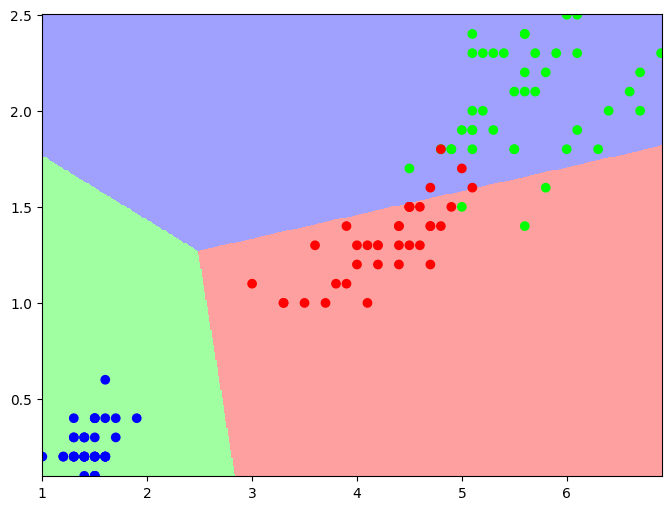

In [23]:
plt.figure(figsize=(8,6))

cm_bg = mpl.colors.ListedColormap(["#A0FFA0", "#FFA0A0","#A0A0FF"])

plt.pcolormesh(m1, m2, n, cmap=cm_bg)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap="brg")
plt.show()